#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn import model_selection
from sklearn import gaussian_process
from sklearn import discriminant_analysis
%matplotlib inline

#### Read Dataset

In [2]:
wine_df = pd.read_csv('H:/Sem-V/Application of ML in Inds/lab3/winequality-red.csv')

### Data Exploration, Visualisation & Preprocessing

In [3]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Filling empty values with the mean of that feature

In [5]:
wine_df['fixed acidity'].fillna(int(wine_df['fixed acidity'].mean()), inplace=True)
wine_df['volatile acidity'].fillna(int(wine_df['volatile acidity'].mean()), inplace=True)
wine_df['citric acid'].fillna(int(wine_df['citric acid'].mean()), inplace=True)
wine_df['residual sugar'].fillna(int(wine_df['residual sugar'].mean()), inplace=True)
wine_df['chlorides'].fillna(int(wine_df['chlorides'].mean()), inplace=True)
wine_df['free sulfur dioxide'].fillna(int(wine_df['free sulfur dioxide'].mean()), inplace=True)
wine_df['total sulfur dioxide'].fillna(int(wine_df['total sulfur dioxide'].mean()), inplace=True)
wine_df['density'].fillna(int(wine_df['density'].mean()), inplace=True)
wine_df['pH'].fillna(int(wine_df['pH'].mean()), inplace=True)
wine_df['sulphates'].fillna(int(wine_df['sulphates'].mean()), inplace=True)
wine_df['alcohol'].fillna(int(wine_df['alcohol'].mean()), inplace=True)
wine_df['quality'].fillna(int(wine_df['quality'].mean()), inplace=True)

#### Visualisation of quality vs instances in dataset

Distribution of wine by quality in dataset =>
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
AxesSubplot(0.286,0.125;0.453x0.755)


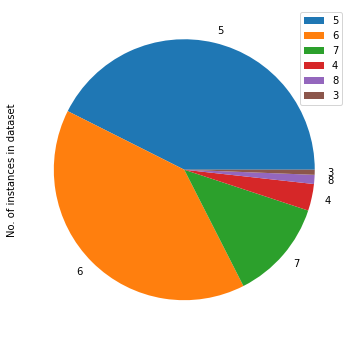

In [6]:
print("Distribution of wine by quality in dataset =>")
print(wine_df["quality"].value_counts())
print(wine_df["quality"].value_counts().plot.pie(ylabel="No. of instances in dataset", figsize=(10, 6), legend=True))

#### Observation :
From the pie chart, we can see that the data is not equally distributed among the all labels. The data points have higher concentration for wine quality 5 & 6 as compared to others.

### Correlation Matrix
Observing whether any 2 columns are related or not.

<AxesSubplot:>

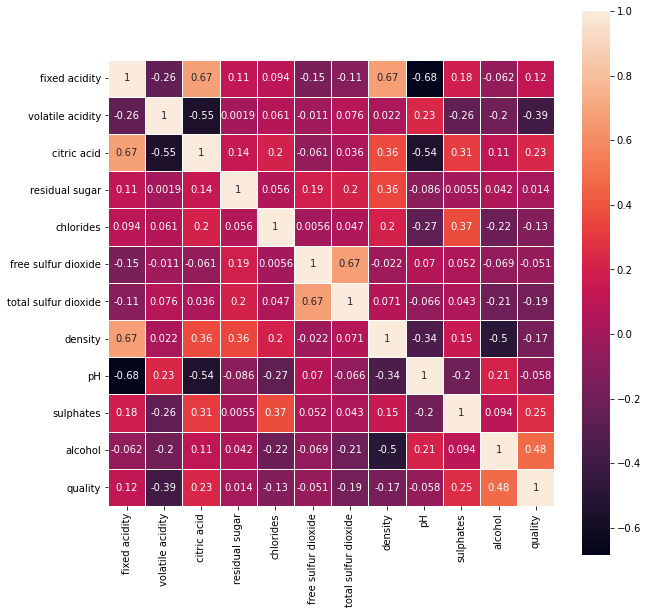

In [7]:
_, graph = plt.subplots(figsize=(10, 10))
sns.heatmap(wine_df.corr(), annot=True, linewidths=.5, ax=graph, square=True)

#### Correlation values of all features with quality

In [8]:
wine_df.corr()[["quality"]].abs().sort_values(by="quality", ascending=False)

,quality
quality,1.000000
alcohol,0.476166
volatile acidity,0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,0.185100
density,0.174919
chlorides,0.128907
fixed acidity,0.124052
pH,0.057731


### Extract Useful Features from Data
#### Dividing dataset into Input and Output variables

In [9]:
datasetX = wine_df[["alcohol", "volatile acidity", "sulphates", "citric acid","total sulfur dioxide", "density", "chlorides", "fixed acidity", "pH", "free sulfur dioxide", "residual sugar"]]
datasetY = wine_df["quality"]
print("Mean X\n",np.mean(datasetX),"\n")
print("Max X\n",np.max(datasetX),"\n")
print("Min X\n",np.min(datasetX),"\n")
print("Std Dev X\n",np.std(datasetX),"\n\n")
print("Mean Y\n",np.mean(datasetY),"\n")
print("Max Y\n",np.max(datasetY),"\n")
print("Min Y\n",np.min(datasetY),"\n")
print("Std Dev Y\n",np.std(datasetY),"\n")

Mean X
 alcohol                 10.422983
volatile acidity         0.527821
sulphates                0.658149
citric acid              0.270976
total sulfur dioxide    46.467792
density                  0.996747
chlorides                0.087467
fixed acidity            8.319637
pH                       3.311113
free sulfur dioxide     15.874922
residual sugar           2.538806
dtype: float64 

Max X
 alcohol                  14.90000
volatile acidity          1.58000
sulphates                 2.00000
citric acid               1.00000
total sulfur dioxide    289.00000
density                   1.00369
chlorides                 0.61100
fixed acidity            15.90000
pH                        4.01000
free sulfur dioxide      72.00000
residual sugar           15.50000
dtype: float64 

Min X
 alcohol                 8.40000
volatile acidity        0.12000
sulphates               0.33000
citric acid             0.00000
total sulfur dioxide    6.00000
density                 0.99007
chlo

#### Applying K-Fold cross validation to test performance on different algorithms
#### K-Fold
Dividing dataset into 10 folds. The number 10 is totally arbitrary in this case.

In [10]:
kfold = model_selection.KFold(n_splits=10, random_state=11, shuffle=True)

#### KNeighborsClassifier

In [11]:
# Parameters for KNN
parameters = {"algorithm" : ["ball_tree", "kd_tree", "brute"]}

# Constructing model
model = neighbors.KNeighborsClassifier(n_neighbors=6, n_jobs=-1)

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,
1,0.007778,0.001773,0.042287,0.004165,ball_tree,{'algorithm': 'ball_tree'},0.40625,0.50625,0.55625,0.5125,0.55,0.48125,0.49375,0.4,0.55,0.459119,0.491537,0.05338
1,0.011169,0.007912,0.034010,0.003381,kd_tree,{'algorithm': 'kd_tree'},0.40625,0.50625,0.55625,0.5125,0.55,0.48125,0.49375,0.4,0.55,0.459119,0.491537,0.05338
1,0.005885,0.001217,0.070511,0.015728,brute,{'algorithm': 'brute'},0.40625,0.50625,0.55625,0.5125,0.55,0.48125,0.49375,0.4,0.55,0.459119,0.491537,0.05338


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

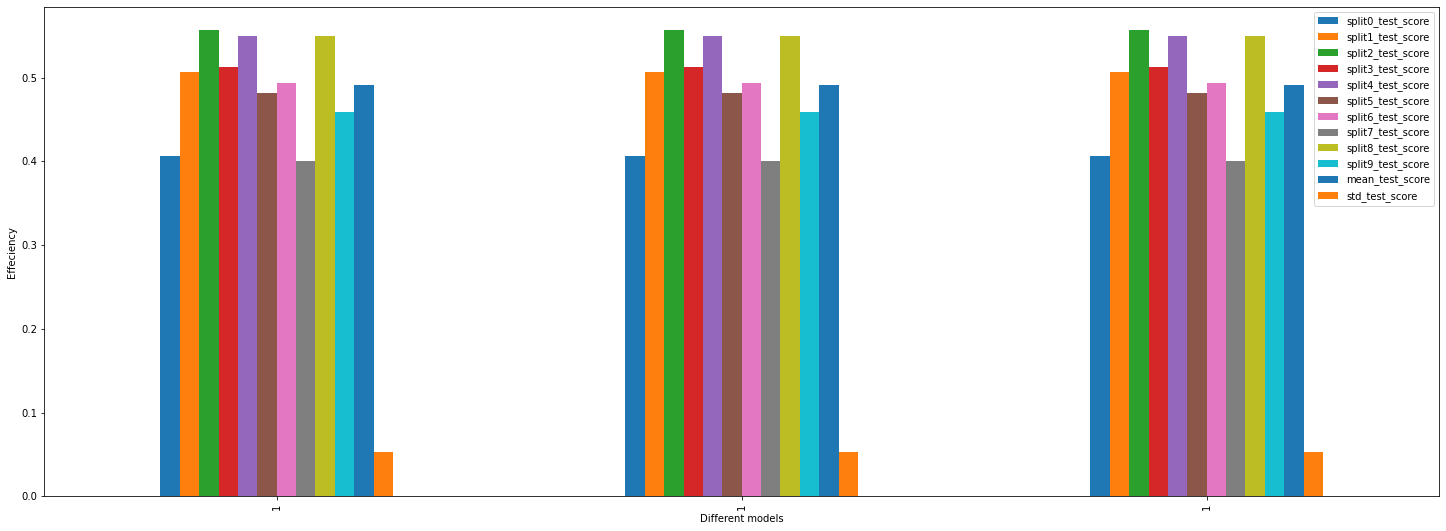

In [12]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")

#### Gaussian Process Classifier

In [13]:
# Parameters for GPC
parameters = {"n_restarts_optimizer" : [4, 7, 10],
              "multi_class" : ["one_vs_rest", "one_vs_one"]
             }

# Constructing model
model = gaussian_process.GaussianProcessClassifier(warm_start=True, n_jobs=-1)

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,param_n_restarts_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,
1,5.575395,0.288276,1.331456,0.196378,one_vs_one,4,"{'multi_class': 'one_vs_one', 'n_restarts_opti...",0.56875,0.65625,0.625,0.60625,0.61875,0.5875,0.59375,0.51875,0.58750,0.547170,0.590967,0.037529
1,5.195968,0.348268,1.529771,0.141044,one_vs_one,7,"{'multi_class': 'one_vs_one', 'n_restarts_opti...",0.56875,0.65625,0.625,0.60625,0.61875,0.5875,0.59375,0.51875,0.58750,0.547170,0.590967,0.037529
1,4.828221,0.830744,1.062768,0.380849,one_vs_one,10,"{'multi_class': 'one_vs_one', 'n_restarts_opti...",0.56875,0.65625,0.625,0.60625,0.61875,0.5875,0.59375,0.51875,0.58750,0.547170,0.590967,0.037529
4,15.814459,0.938372,2.247244,0.144515,one_vs_rest,4,"{'multi_class': 'one_vs_rest', 'n_restarts_opt...",0.56875,0.64375,0.625,0.60625,0.61250,0.5750,0.58125,0.50625,0.58125,0.534591,0.583459,0.039205
4,15.396918,0.886761,2.395824,0.224224,one_vs_rest,7,"{'multi_class': 'one_vs_rest', 'n_restarts_opt...",0.56875,0.64375,0.625,0.60625,0.61250,0.5750,0.58125,0.50625,0.58125,0.534591,0.583459,0.039205
4,15.339706,1.233558,2.643726,0.183344,one_vs_rest,10,"{'multi_class': 'one_vs_rest', 'n_restarts_opt...",0.56875,0.64375,0.625,0.60625,0.61250,0.5750,0.58125,0.50625,0.58125,0.534591,0.583459,0.039205


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

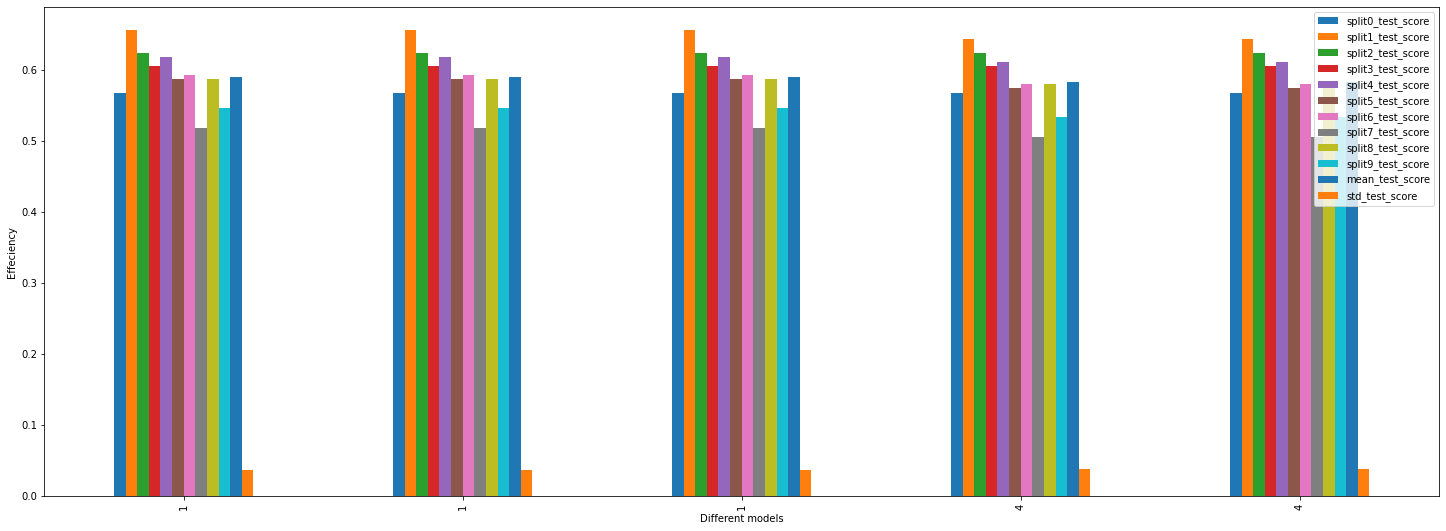

In [14]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", "param_n_restarts_optimizer"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")

#### Decision Tree Classifier

In [15]:
# Parameters for DTC
parameters = {"criterion" : ["gini", "entropy"],
              "splitter" : ["best", "random"],
              "max_features" : ["sqrt", "log2", None]
             }

# Constructing model
model = tree.DecisionTreeClassifier()

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,,
1,0.028241,0.009415,0.004687,0.007159,entropy,None,best,"{'criterion': 'entropy', 'max_features': None,...",0.60625,0.63125,0.65000,0.65000,0.72500,0.63125,0.64375,0.56875,0.71250,0.635220,0.645397,0.043354
2,0.006989,0.007132,0.002464,0.004735,entropy,log2,random,"{'criterion': 'entropy', 'max_features': 'log2...",0.61250,0.69375,0.64375,0.69375,0.69375,0.56250,0.65000,0.53750,0.68125,0.584906,0.635366,0.055292
3,0.006249,0.007653,0.001562,0.004687,entropy,None,random,"{'criterion': 'entropy', 'max_features': None,...",0.60625,0.71250,0.60625,0.61875,0.71250,0.60625,0.62500,0.60625,0.63125,0.603774,0.632877,0.040776
4,0.014059,0.004686,0.003125,0.006250,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.53750,0.66250,0.61875,0.61875,0.66250,0.60625,0.63125,0.64375,0.68125,0.628931,0.629143,0.037811
5,0.020514,0.007029,0.001562,0.004686,gini,None,best,"{'criterion': 'gini', 'max_features': None, 's...",0.63125,0.67500,0.65625,0.65625,0.66250,0.55000,0.61875,0.60000,0.61875,0.610063,0.627881,0.035166
6,0.009163,0.007631,0.005428,0.006773,entropy,log2,best,"{'criterion': 'entropy', 'max_features': 'log2...",0.56875,0.63750,0.61875,0.70000,0.66875,0.61875,0.61875,0.54375,0.66250,0.622642,0.626014,0.043566
7,0.007811,0.007811,0.006249,0.007653,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.61250,0.68750,0.63750,0.61250,0.68750,0.60625,0.58750,0.59375,0.64375,0.591195,0.625994,0.035355
8,0.004687,0.007159,0.003124,0.006249,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.60000,0.59375,0.65000,0.65000,0.68750,0.54375,0.63750,0.63125,0.65000,0.610063,0.625381,0.037949
9,0.007810,0.007810,0.000000,0.000000,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.54375,0.65625,0.63750,0.60625,0.66875,0.59375,0.62500,0.59375,0.67500,0.647799,0.624780,0.038694


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

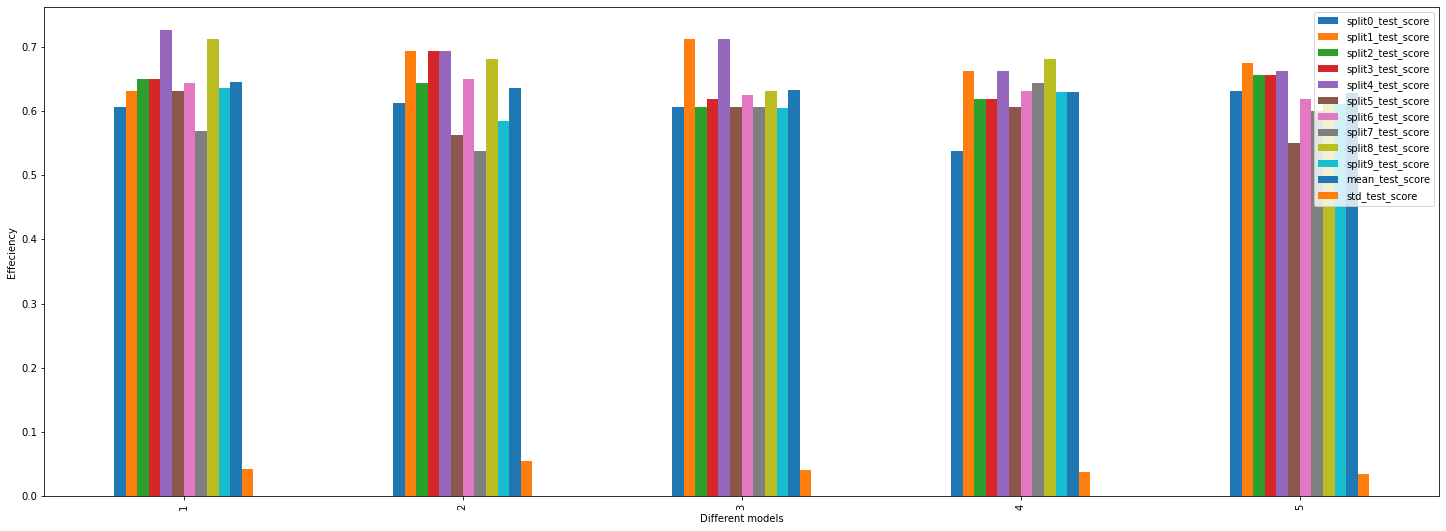

In [16]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")

#### Random Forest Classifier

In [17]:
# Parameters for RFC
parameters = {"criterion" : ["gini", "entropy"],
              "class_weight" : ["balanced", "balanced_subsample", None],
              "max_features" : ["sqrt", "log2", None]
             }

# Constructing model
model = ensemble.RandomForestClassifier(n_jobs=-1, warm_start=True)

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

C:\Users\khura\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,,
1,1.019293,0.154641,0.138591,0.099906,balanced,entropy,sqrt,"{'class_weight': 'balanced', 'criterion': 'ent...",0.68125,0.76250,0.72500,0.78750,0.75000,0.65000,0.75625,0.62500,0.74375,0.660377,0.714163,0.052732
1,1.284910,0.103926,0.223780,0.246636,balanced_subsample,entropy,log2,"{'class_weight': 'balanced_subsample', 'criter...",0.65000,0.76875,0.78125,0.78125,0.75000,0.65625,0.75000,0.61250,0.73125,0.660377,0.714163,0.059616
3,0.783841,0.218456,0.128710,0.085586,balanced,gini,log2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.64375,0.76875,0.73750,0.80000,0.73125,0.65625,0.72500,0.64375,0.73750,0.679245,0.712300,0.051284
4,0.729813,0.076957,0.074190,0.013708,balanced,gini,sqrt,"{'class_weight': 'balanced', 'criterion': 'gin...",0.66250,0.76250,0.75625,0.77500,0.70000,0.66250,0.75000,0.63750,0.73125,0.679245,0.711675,0.046860
5,1.342651,0.148973,0.115549,0.043066,balanced_subsample,entropy,sqrt,"{'class_weight': 'balanced_subsample', 'criter...",0.65000,0.75000,0.77500,0.77500,0.75000,0.64375,0.70625,0.63125,0.75000,0.666667,0.709792,0.054159
6,0.888018,0.307874,0.143398,0.127831,None,gini,sqrt,"{'class_weight': None, 'criterion': 'gini', 'm...",0.63125,0.75000,0.75000,0.81250,0.76250,0.64375,0.72500,0.63750,0.71875,0.647799,0.707905,0.060362
7,2.061779,0.413997,0.475277,0.588552,balanced,entropy,None,"{'class_weight': 'balanced', 'criterion': 'ent...",0.65000,0.74375,0.76875,0.79375,0.75000,0.63750,0.72500,0.64375,0.71250,0.641509,0.706651,0.055911
8,2.056654,0.290688,0.488753,0.377547,balanced_subsample,entropy,None,"{'class_weight': 'balanced_subsample', 'criter...",0.65625,0.75000,0.75000,0.76875,0.71875,0.64375,0.75000,0.64375,0.72500,0.654088,0.706034,0.048155
9,0.891077,0.208350,0.201903,0.126540,None,entropy,sqrt,"{'class_weight': None, 'criterion': 'entropy',...",0.65625,0.72500,0.73125,0.76875,0.73750,0.65000,0.75625,0.64375,0.75000,0.635220,0.705397,0.049882


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

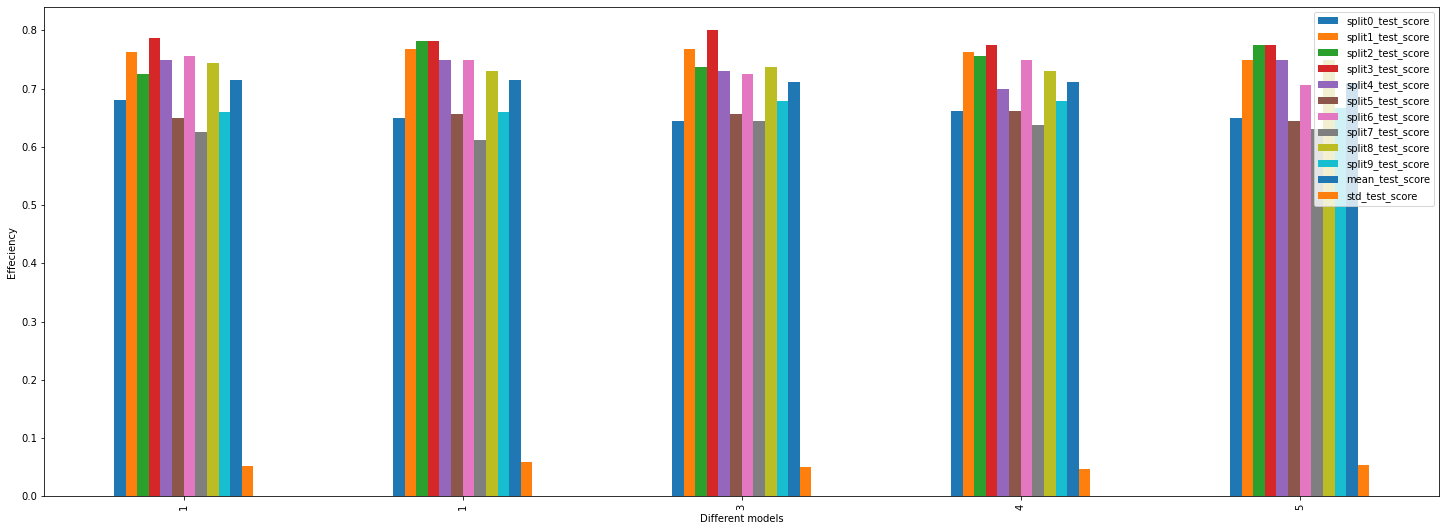

In [18]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")

#### MLP Classifier

In [19]:
# Parameters for MLPC
parameters = {"hidden_layer_sizes" : [30, 70, 110],
              "activation" : ["identity", "logistic", "tanh", "relu"],
              "solver" : ["lbfgs", "sgd", "adam"],
              "learning_rate" : ["constant", "invscaling", "adaptive"]
             }

# Constructing model
model = neural_network.MLPClassifier(warm_start=True, early_stopping=True)

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

C:\Users\khura\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,,,
1,0.986923,0.065766,0.001003,0.002114,relu,30,invscaling,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.56875,0.59375,0.61875,0.65625,0.66250,0.54375,0.60000,0.5500,0.58750,0.553459,0.593471,0.039997
2,1.618347,0.053727,0.006250,0.007654,relu,70,constant,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 7...",0.58750,0.56875,0.66875,0.65625,0.64375,0.53125,0.62500,0.5250,0.57500,0.547170,0.592842,0.049817
3,1.618327,0.070359,0.003427,0.006166,relu,70,adaptive,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 7...",0.58750,0.58750,0.62500,0.63750,0.64375,0.53125,0.62500,0.5500,0.58125,0.540881,0.590963,0.038909
4,2.533761,0.086400,0.003125,0.006251,relu,110,invscaling,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.56875,0.55625,0.65000,0.64375,0.63750,0.52500,0.64375,0.5375,0.57500,0.553459,0.589096,0.046646
5,2.525400,0.100110,0.004427,0.006155,relu,110,constant,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.58750,0.58750,0.63750,0.65000,0.63125,0.53125,0.63125,0.5375,0.56250,0.534591,0.589084,0.043929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.233921,0.025522,0.004127,0.006132,logistic,110,invscaling,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.39375,0.48125,0.37500,0.41875,0.41875,0.42500,0.46875,0.4875,0.44375,0.427673,0.434017,0.034763
105,0.241591,0.056662,0.003125,0.006249,tanh,70,invscaling,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': 7...",0.48750,0.33750,0.47500,0.43125,0.33125,0.35000,0.49375,0.4125,0.41250,0.446541,0.417779,0.057877
106,0.211779,0.050686,0.001564,0.004692,logistic,70,invscaling,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.40625,0.46875,0.37500,0.40000,0.41875,0.38750,0.46875,0.4000,0.40000,0.314465,0.403947,0.042173


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

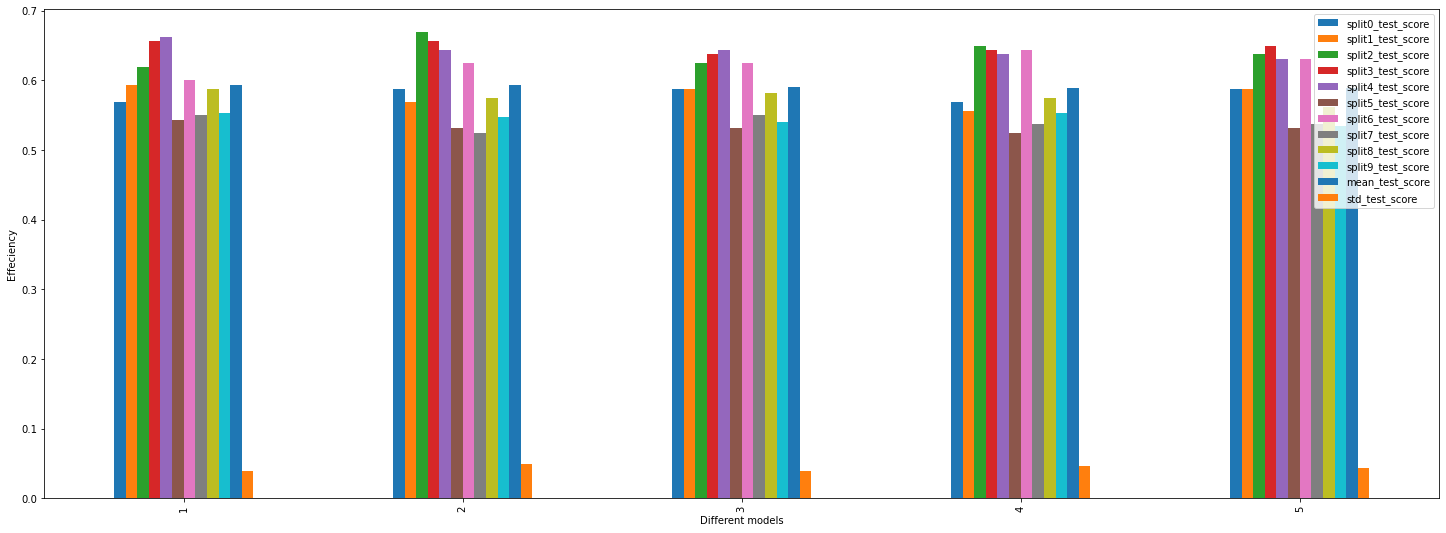

In [20]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", "param_hidden_layer_sizes"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")

#### Ada Boost Classifier

In [21]:
# Parameters for ABC
parameters = {"algorithm" : ["SAMME", "SAMME.R"],
              "n_estimators" : [30, 70, 110]
             }

# Constructing model
model = ensemble.AdaBoostClassifier()

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,
1,0.169406,0.009311,0.015622,0.000004,SAMME.R,30,"{'algorithm': 'SAMME.R', 'n_estimators': 30}",0.45625,0.58125,0.51875,0.55625,0.59375,0.53750,0.60625,0.45625,0.50625,0.522013,0.533451,0.049763
1,0.394222,0.013525,0.031340,0.001929,SAMME.R,70,"{'algorithm': 'SAMME.R', 'n_estimators': 70}",0.45625,0.58125,0.51875,0.55625,0.59375,0.53750,0.60625,0.45625,0.50625,0.522013,0.533451,0.049763
1,0.598178,0.027633,0.040121,0.007153,SAMME.R,110,"{'algorithm': 'SAMME.R', 'n_estimators': 110}",0.45625,0.58125,0.51875,0.55625,0.59375,0.53750,0.60625,0.45625,0.50625,0.522013,0.533451,0.049763
4,0.299510,0.016178,0.024215,0.007460,SAMME,70,"{'algorithm': 'SAMME', 'n_estimators': 70}",0.49375,0.63750,0.60000,0.59375,0.56250,0.46875,0.55625,0.40000,0.51875,0.503145,0.533439,0.067053
5,0.121780,0.011013,0.006800,0.007376,SAMME,30,"{'algorithm': 'SAMME', 'n_estimators': 30}",0.47500,0.57500,0.54375,0.62500,0.57500,0.53125,0.61250,0.43750,0.51875,0.433962,0.532771,0.063974
6,0.517357,0.010829,0.026068,0.007083,SAMME,110,"{'algorithm': 'SAMME', 'n_estimators': 110}",0.45000,0.55000,0.63125,0.59375,0.58750,0.50000,0.50000,0.46875,0.46875,0.477987,0.522799,0.059926


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

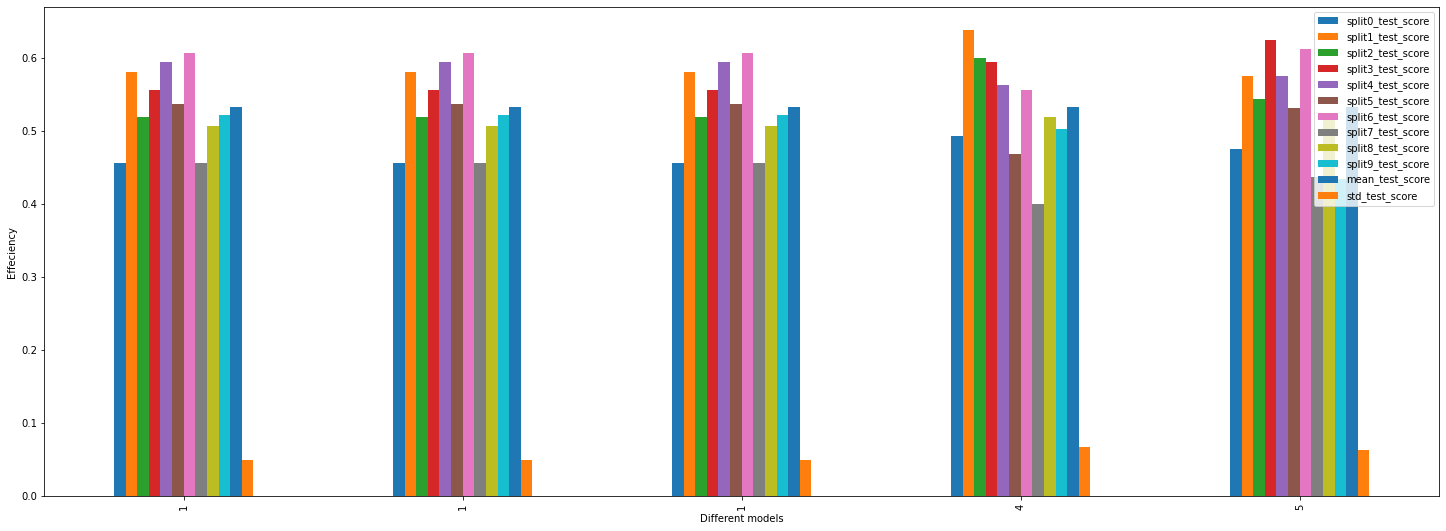

In [22]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", "param_n_estimators"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")

#### Gaussian Naive Bayes

In [23]:
# Parameters for GNB
parameters = {}

# Constructing model
model = naive_bayes.GaussianNB()

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,
1,0.004636,0.007081,0.001566,0.004697,{},0.50625,0.55625,0.575,0.63125,0.5375,0.46875,0.59375,0.4875,0.525,0.534591,0.541584,0.04681


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

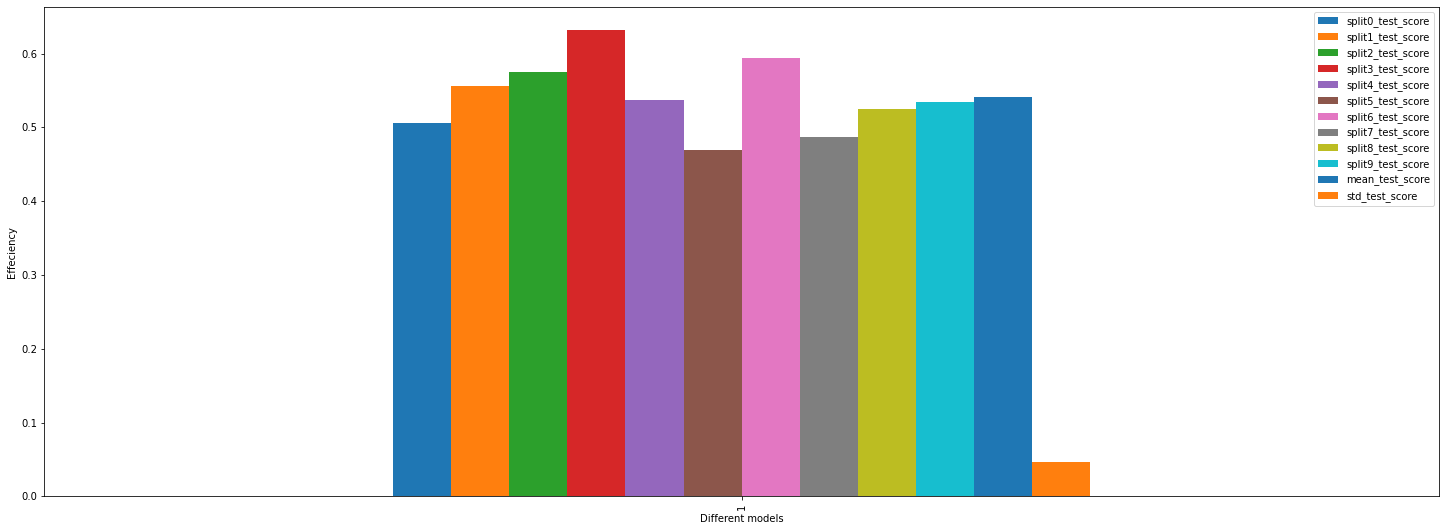

In [24]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")

#### Quadratic Discriminant Analysis

In [25]:
# Parameters for QDA
parameters = {}

# Constructing model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()

# Setting up grid search cross validation
searcher = model_selection.GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=kfold, return_train_score=False)

# Training the model
searcher.fit(datasetX, datasetY)

# Printing the results
pd.set_option("display.max_columns", None)
pd.DataFrame(searcher.cv_results_).set_index("rank_test_score").sort_values(by="rank_test_score")

C:\Users\khura\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,
1,0.3483,0.174256,0.004663,0.006249,{},0.475,0.5875,0.59375,0.61875,0.58125,0.45625,0.58125,0.5125,0.55625,0.559748,0.552225,0.050897


<AxesSubplot:xlabel='Different models', ylabel='Effeciency'>

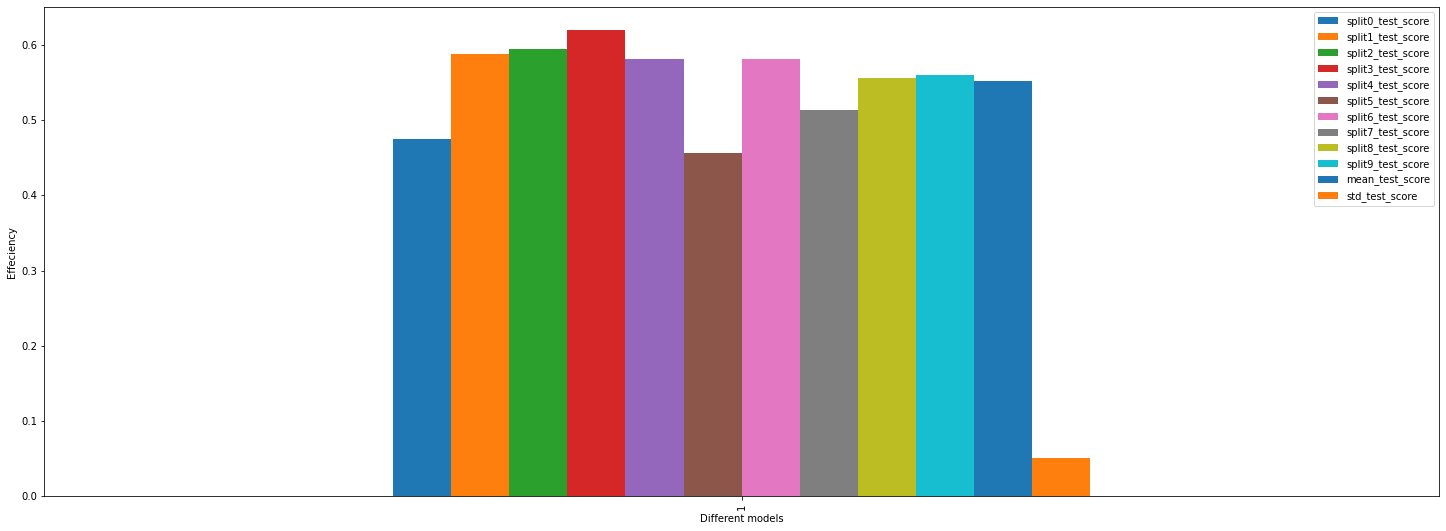

In [26]:
pd.DataFrame(searcher.cv_results_).sort_values(by="rank_test_score").set_index("rank_test_score").drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"], axis="columns").head(5).plot.bar(figsize=(25,9), xlabel="Different models", ylabel="Effeciency")